In [1]:
from RandomForest import RandomForestRegressor, load_model
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
def preprocess(data):
    data = pd.get_dummies(data, columns=['LotShapeB'])
    cols_at_end = ['B_rate']
    data = data[[c for c in data if c not in cols_at_end]
            + [c for c in cols_at_end if c in data]]
    return data

df = pd.read_csv('data.csv')
df = preprocess(df)
data = df.values.tolist()

train, test = train_test_split(data, test_size=0.2)
X_train, y_train = [row[:-1] for row in train], [row[-1] for row in train]
X_test, y_test = [row[:-1] for row in test], [row[-1] for row in test]

## Splitting on single feature and then splitting on other features:
While using the model.fit:

* force_split - to choose the feature
* splits - number of times to split solely on the feature
* remove from split - number of splits without the feature after the first splits

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:27<00:00,  2.08s/it]


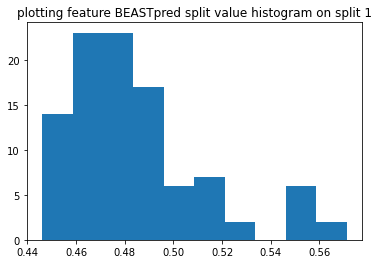

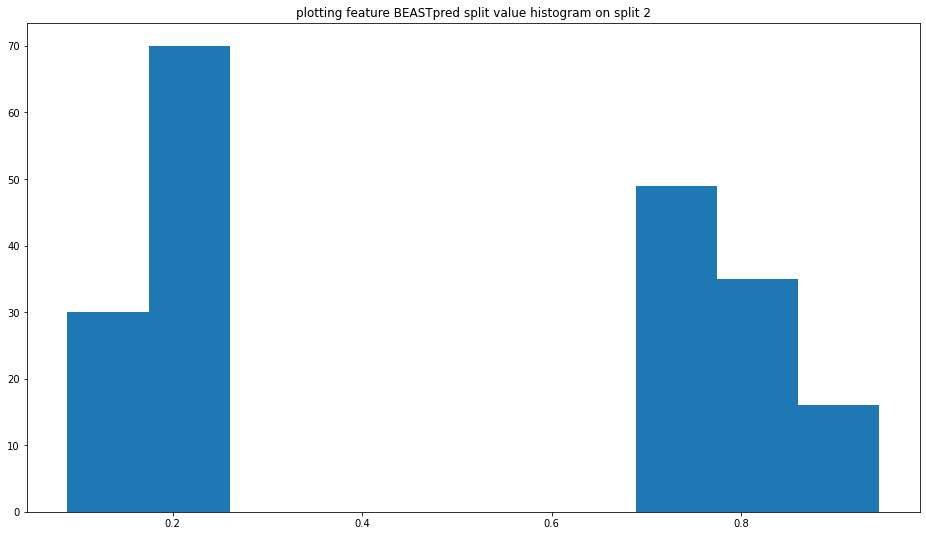

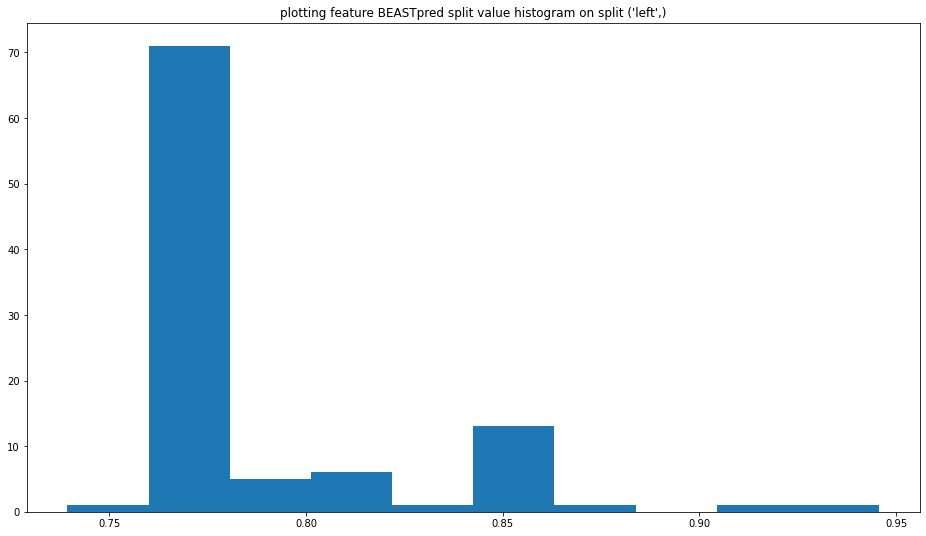

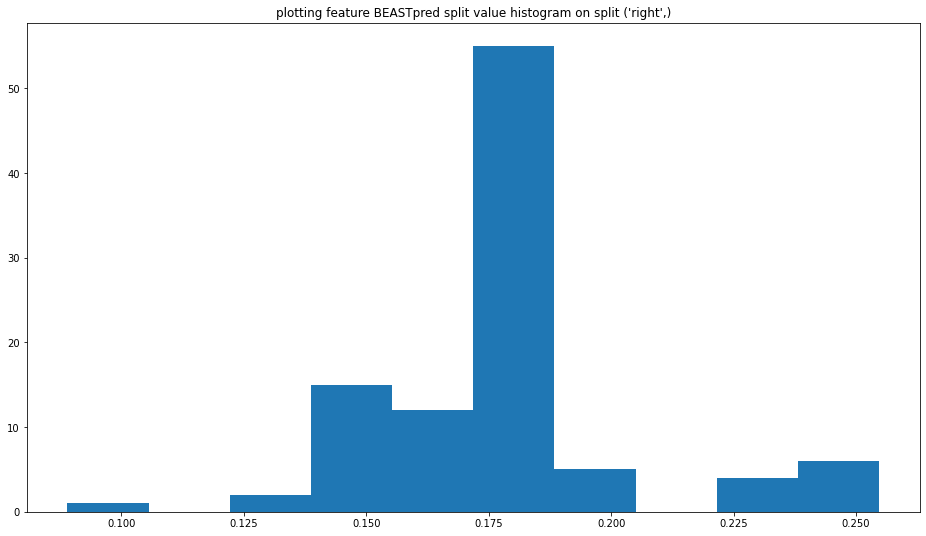

In [3]:
model = RandomForestRegressor(max_depth=None, nb_trees=100, min_samples_split=10, min_samples_leaf=5, max_features=1/3)
headers = ['Ha', 'pHa', 'La', 'Hb', 'pHb', 'Lb', 'LotNumB', 'Corr', 'diffEV', 'diffSDs', 'diffMins', 'diffMaxs', 'diffUV', 'RatioMin', 'SignMax', 'pBbet_UnbiasedFB', 'pBbet_Uniform', 'pBbet_SignFB', 'Dom', 'diffSignEV', 'BEASTpred', 'LotShapeB_-', 'LotShapeB_L-skew', 'LotShapeB_R-skew', 'LotShapeB_Symm']
model.pre_set_features_names(headers)
model.fit(X_train, y_train, force_split='BEASTpred', splits=2, remove_from_split=1, show_histogram=True)

# Visualization

In [5]:
model.print_tree_topdown(0)

Left branch is the true branch represented by the ͱ sign
That is all observations with value x>=SplitValue
Right branch (false branch) is represented by ∟ sign
	BEASTpred: 0.471
	ͱ———BEASTpred: 0.762
	|  ͱ———pBbet_UnbiasedFB: 0.981
	|  |  ͱ———diffMins: -19.0
	|  |  |  ͱ———diffSignEV: 0.056
	|  |  |  |  ͱ———diffEV: 3.65
	|  |  |  |  |  ͱ———pBbet_UnbiasedFB: 0.987
	|  |  |  |  |  |  ͱ———diffMins: 10.25
	|  |  |  |  |  |  |  ͱ———diffSDs: 3.631
	|  |  |  |  |  |  |  |  ͱ———0.876
	|  |  |  |  |  |  |  |  ∟———pBbet_SignFB: 0.197
	|  |  |  |  |  |  |  |      ͱ———diffEV: 12.3
	|  |  |  |  |  |  |  |      |  ͱ———0.904
	|  |  |  |  |  |  |  |      |  ∟———0.884
	|  |  |  |  |  |  |  |      ∟———0.92
	|  |  |  |  |  |  |  ∟———Hb: 41.0
	|  |  |  |  |  |  |      ͱ———LotShapeB_R-skew: 0.5
	|  |  |  |  |  |  |      |  ͱ———0.945
	|  |  |  |  |  |  |      |  ∟———pHb: 0.03
	|  |  |  |  |  |  |      |      ͱ———Hb: 50.0
	|  |  |  |  |  |  |      |      |  ͱ———0.882
	|  |  |  |  |  |  |      |      |  ∟———0.

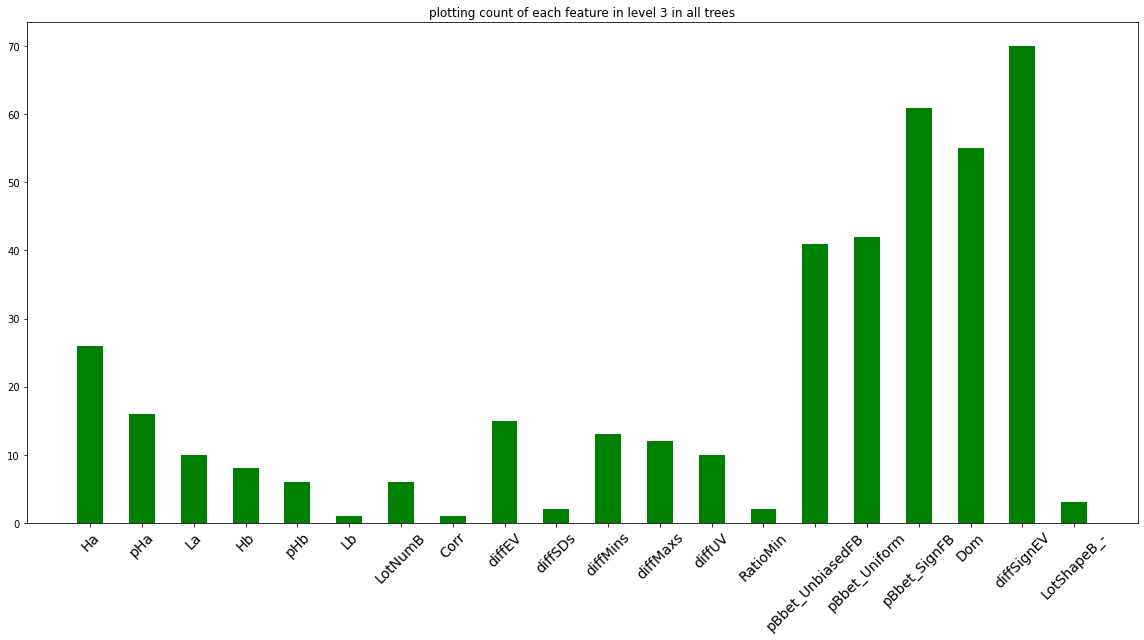

In [6]:
model.feature_histogram(3, hide_zeros=True)

In [7]:
model.get_features_in_level(3)

{'Ha': 26,
 'pHa': 16,
 'La': 10,
 'Hb': 8,
 'pHb': 6,
 'Lb': 1,
 'LotNumB': 6,
 'Corr': 1,
 'diffEV': 15,
 'diffSDs': 2,
 'diffMins': 13,
 'diffMaxs': 12,
 'diffUV': 10,
 'RatioMin': 2,
 'SignMax': 0,
 'pBbet_UnbiasedFB': 41,
 'pBbet_Uniform': 42,
 'pBbet_SignFB': 61,
 'Dom': 55,
 'diffSignEV': 70,
 'BEASTpred': 0,
 'LotShapeB_-': 3,
 'LotShapeB_L-skew': 0,
 'LotShapeB_R-skew': 0,
 'LotShapeB_Symm': 0}

In [8]:
model.get_statistics([3,4])

{'Ha': [0.5,
  0.5,
  4.5,
  17.5,
  15.5,
  6.5,
  0.5,
  1.5,
  2.5,
  6.5,
  0.5,
  0.5,
  1.5,
  0.5,
  0.5,
  1.5,
  11.5,
  4.5,
  0.5,
  6.5,
  0.5,
  3.5,
  0.5,
  0.5,
  0.5,
  0.5,
  7.5,
  2.5,
  6.5,
  7.5,
  0.5,
  9.5,
  0.5,
  32.0,
  8.5,
  3.0,
  1.5,
  13.5,
  0.5,
  3.5,
  9.5,
  7.5,
  3.5,
  6.5,
  28.5,
  0.5,
  5.5,
  6.5,
  1.5,
  4.5,
  0.5,
  3.5,
  2.5,
  6.5,
  9.5,
  14.5,
  6.5,
  9.5,
  7.0,
  6.5,
  9.5,
  22.0,
  11.5,
  28.5,
  6.5,
  9.5,
  3.5,
  1.5,
  20.5,
  -1.5,
  28.5,
  4.5,
  0.5,
  6.5,
  6.5,
  4.0,
  4.5,
  0.5,
  8.5,
  6.5],
 'pHa': [0.925,
  0.995,
  0.995,
  0.8500000000000001,
  0.8500000000000001,
  0.995,
  0.675,
  0.97,
  0.97,
  0.8500000000000001,
  0.925,
  0.995,
  0.8500000000000001,
  0.97,
  0.775,
  0.97,
  0.8500000000000001,
  0.97,
  0.995,
  0.875,
  0.995,
  0.97,
  0.925,
  0.675,
  0.925,
  0.995,
  0.97,
  0.995,
  0.8500000000000001,
  0.675,
  0.97,
  0.995,
  0.675,
  0.97,
  0.995,
  0.8500000000000001,
  0.995

In [13]:
model.get_values_in_level(0, son=['left'])

[0.7619750000000001,
 0.776025,
 0.874175,
 0.8605750000000001,
 0.76125,
 0.83995,
 0.7619750000000001,
 0.76355,
 0.771675,
 0.7744,
 0.8607,
 0.77365,
 0.7635,
 0.776025,
 0.8607,
 0.7635,
 0.772375,
 0.7795000000000001,
 0.7635,
 0.771675,
 0.90575,
 0.7766500000000001,
 0.777025,
 0.7766500000000001,
 0.785175,
 0.77685,
 0.7622,
 0.810875,
 0.945675,
 0.8607,
 0.772375,
 0.7766500000000001,
 0.7629999999999999,
 0.7766500000000001,
 0.7619750000000001,
 0.776325,
 0.7622,
 0.776,
 0.7766500000000001,
 0.7812749999999999,
 0.7812749999999999,
 0.81575,
 0.777025,
 0.8157,
 0.8607,
 0.7635,
 0.77365,
 0.768825,
 0.761825,
 0.76305,
 0.76355,
 0.793175,
 0.772375,
 0.8605750000000001,
 0.7635,
 0.8605750000000001,
 0.8186,
 0.7619750000000001,
 0.8605750000000001,
 0.8607,
 0.77685,
 0.7619750000000001,
 0.7635,
 0.77685,
 0.77685,
 0.774,
 0.77365,
 0.8607,
 0.774,
 0.8605750000000001,
 0.7619750000000001,
 0.8605750000000001,
 0.7635,
 0.77365,
 0.7771250000000001,
 0.763625,
 0.7

In [14]:
model.get_values_in_level(0, son=['left','rihgt'])

[0.24664999999999998,
 0.995,
 3.95,
 0.5,
 0.0781250000000142,
 -7.5,
 0.24755,
 4.4,
 0.004687500000014199,
 0.5,
 4.5,
 10.65,
 3.5,
 0.705,
 0.995,
 0.20335,
 -2.5,
 12.075,
 4.35,
 0.0046875000000071,
 0.0006,
 0.445,
 0.24855,
 5.7575,
 0.5,
 1.5,
 0.365,
 -3.6333333335,
 0.9037999999999999,
 0.09715,
 -1.5,
 0.09615,
 5.7125,
 0.995,
 0.0046875000000071,
 1.5,
 0.09305,
 0.5,
 0.56,
 2.5,
 5.675,
 0.445,
 0.004687500000014199,
 0.8500000000000001,
 0.41500000000000004,
 0.745,
 0.09595000000000001,
 0.995,
 4.4,
 0.09615,
 12.075,
 0.2374686715,
 0.232051282,
 0.39255,
 0.09655,
 1.5,
 0.445,
 0.09655,
 0.95,
 57.5,
 3.675,
 0.995,
 6.8,
 0.09655,
 1.5,
 0.8500000000000001,
 0.25225,
 0.004687500000014199,
 0.5,
 4.5,
 0.09615,
 0.995,
 0.0046875000000071,
 0.24855,
 0.20384999999999998,
 0.475,
 0.0781250000000142,
 4.25,
 0.37655,
 3.5,
 0.8500000000000001,
 11.5,
 0.004687500000014199,
 1.5,
 0.0959,
 0.24855,
 0.0046875000000071,
 -32.95,
 -2.5,
 0.09620000000000001,
 0.0923

In [15]:
model.save('pres')